<a href="https://colab.research.google.com/github/youngjin1106/sales-predictions/blob/main/Project_1_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# 1. How many rows and columns?
df.shape
# it tells you that there has 8523 rows and 12 columns with this data.

(8523, 12)

In [7]:
# 2. what are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
# 3.Are there duplicates? if so, drop any duplicates.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [9]:
df.duplicated().sum()
# this tell you that there doesn't have any duplicated

0

In [10]:
# 5. Decide on how to address the missing values and do it!

# I decided to fill missing numeric data with an average number 
# because the missing datas are too much.
# If i drop the all the rows which have missing numbers, then i think those dropping datas will be effected a lot to the whatever the result we are looking for.
item_median_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(item_median_weight, inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# I decided to fill missing data with an Unknow word
# because i think using 'Unknown' word is better than using random size or incorrect random size at the missing datas.
median_outlet_size = df['Outlet_Size'] == 'Unknown'
df['Outlet_Size'].fillna(median_outlet_size, inplace = True)

In [12]:
# 6. Confirm that there are no missing values after addressing them
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
# 7. Find and fix any inconsistent categories of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [15]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')

In [16]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

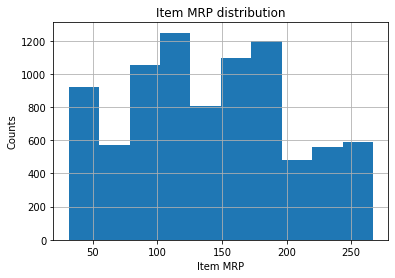

In [17]:
# This histogram shows that between 103 and 125 Item MRP are most represented
# It also shows that between 200 and 225 Item MRP are lowest represented
df['Item_MRP'].hist()
plt.xlabel('Item MRP')
plt.ylabel('Counts')
plt.title('Item MRP distribution')
plt.show()

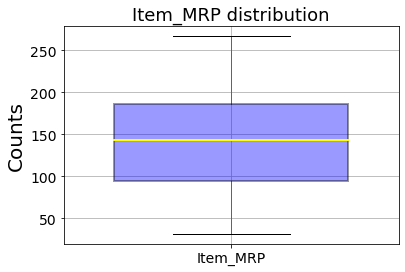

In [18]:
# This boxplot shows that the median is little bit below 150 counts 
# It also shows that the maximum is 275 and minimum is 20
boxplots = df.boxplot(['Item_MRP'],
                      widths = 0.7,
                      patch_artist = True,
                      medianprops = dict(linestyle = '-', linewidth = 2, color = 'Yellow'),
                      boxprops = dict(linestyle = '--', linewidth = 2, color = 'Black', facecolor = 'blue', alpha = 0.4)
                      );

plt.ylabel('Counts', fontsize = 20);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.title('Item_MRP distribution', fontsize = 18);

## Part 4

- Build on your previous cleaning, exploration, and analysis.  
- Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
- Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

In [19]:
# It tells you how much is the total weight for each type of items
numberUniqueItem = df.groupby(['Item_Type'])['Item_Weight'].nunique()
numberUniqueItem

Item_Type
Baking Goods              94
Breads                    42
Breakfast                 19
Canned                    93
Dairy                     95
Frozen Foods             119
Fruits and Vegetables    145
Hard Drinks               37
Health and Hygiene        78
Household                122
Meat                      70
Others                    29
Seafood                   10
Snack Foods              139
Soft Drinks               67
Starchy Foods             29
Name: Item_Weight, dtype: int64

In [20]:
# this tells you how many type of the items we have 
uniqueItem = np.array(numberUniqueItem.index)
uniqueItem

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

In [21]:
# this tells you how much is the total weight in total for each item type
Item_total_weight = np.array(numberUniqueItem.values)
Item_total_weight

array([ 94,  42,  19,  93,  95, 119, 145,  37,  78, 122,  70,  29,  10,
       139,  67,  29])

In [22]:
plt.style.use('seaborn')

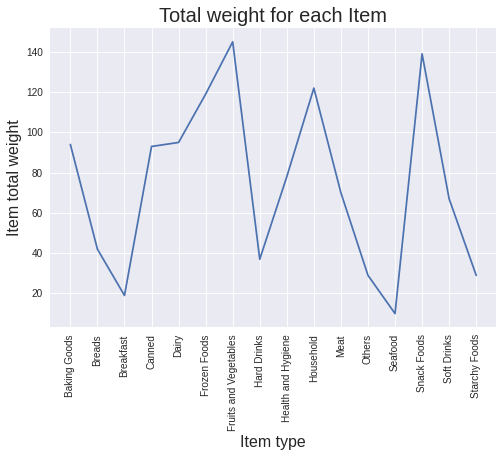

In [46]:
# Through this graph, you can find that Fruits and Vegetables has highest weight in total.
# Highest Weight: Fruits and Vegetables; over 140 in total weight; estimated 147 in total weight;
# You can also find that the Seafood has lowest weight in total.
# Lowest Weight: Seafood; lower 20 in total weight; estimated 10 in total weight
plt.plot(uniqueItem,Item_total_weight)
plt.xlabel('Item type', fontsize = 16)
plt.ylabel('Item total weight', fontsize = 16)
plt.title('Total weight for each Item', fontsize = 20)
plt.xticks(rotation = 90)


plt.grid(c = 'w',
         alpha = .9,
         linestyle = '-')

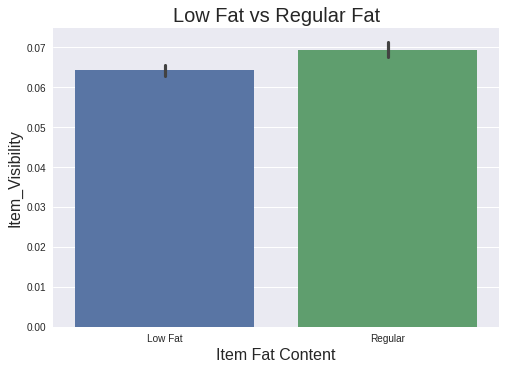

In [33]:
# Using Barplot with seaborn
# this barplot shows that the items of reuglar fat has more visibility than the items of low fat in the total.
sns.barplot(data = df, x ='Item_Fat_Content', y = 'Item_Visibility') 
plt.xlabel('Item Fat Content', fontsize = 16)
plt.ylabel('Item_Visibility', fontsize = 16)
plt.title('Low Fat vs Regular Fat', fontsize = 20)
plt.barplot()

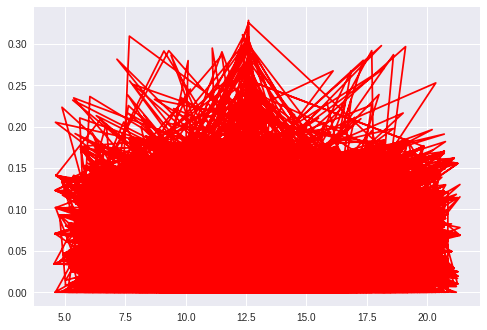

In [37]:
# I was just wondering what happend with this cooding.. but it happened crazy.. haha;;
weight = df['Item_Weight'].values
Visibility = df['Item_Visibility'].values
MRP = df['Item_MRP'].values
plt.plot(weight, Visibility, c = 'r', label = 'Item Weight')
